In [1]:
import pandas as pd
import os

In [2]:
f = open('data_split_by_clausese/autorizacoes.txt', 'r')

In [3]:
strings = f.read().split('\n')

In [4]:
s = [strings[i] for i in range(len(strings)) if len(strings[i]) > 0]
s

['AUTORIZAÇÕES ',
 "Autorizações da Emissora. A presente Escritura de Emissão é celebrada com base nas deliberações tomadas na assembleia geral extraordinária de acionistas da Emissora, realizada em [•] de março de 2023 ('Aprovação Societária Emissora'), na qual foram deliberadas e aprovadas, dentre outras matérias: (i) a realização da Emissão (conforme definido abaixo) e da Oferta Pública (conforme definido abaixo), bem como os seus termos e condições; (ii) a outorga da Cessão Fiduciária (conforme definido abaixo), em favor dos Debenturistas, por meio do Contrato de Cessão Fiduciária (conforme definido abaixo); (iii) a autorização expressa à diretoria da Emissora para praticar todos os atos, tomar todas as providências e adotar todas as medidas necessárias à formalização, efetivação e administração das deliberações tomadas na Aprovação Societária Emissora, bem como para assinar todos e quaisquer documentos relacionados à Emissão e à Oferta Pública, incluindo, mas não se limitando, a e

In [5]:
df = pd.DataFrame({'texto':s})

In [6]:
def get_text_dir(folder):
    '''
        Recebe o caminho de um diretório e retorna uma lista com os caminhos dos arquivos de extensão .docx ordenados
    '''

    only_docx_path = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith('.txt')]
    only_docx_path.sort()
    return only_docx_path

In [7]:
textos = get_text_dir('data_split_by_clausese')

In [8]:
nomes = []
for te in textos:
    nomes.append(te.split('/')[1])

In [9]:
f = open(textos[0], 'r')
f.read()

"AGENTE FIDUCIÁRIO\n\nA Emissora nomeia e constitui a OLIVEIRA TRUST DISTRIBUIDORA DE TÍTULOS E VALORES MOBILIÁRIOS S.A., qualificada no preâmbulo desta Escritura de Emissão, como agente fiduciário da Emissão a qual, neste ato e pela melhor forma de direito, aceita a nomeação para, nos termos da lei e desta Escritura de Emissão, representar os interesses da comunhão dos Debenturistas perante a Emissora.\n\nAgente Fiduciário, nomeado nesta Escritura de Emissão, declara:\n\nnão ter qualquer impedimento legal, conforme artigo 66, parágrafo 3º da Lei das Sociedades por Ações, e na Resolução CVM 17, para exercer a função que lhe é conferida;\n\naceitar a função que lhe é conferida, assumindo integralmente os deveres e atribuições previstos na legislação específica e nesta Escritura de Emissão;\n\naceitar integralmente esta Escritura de Emissão, todas as suas cláusulas e condições;\n\nnão ter qualquer ligação com a Emissora que o impeça de exercer suas funções;\n\nestar ciente das disposiçõe

In [10]:
linha = open(textos[0], 'r').read().split('\n')
linha
paragrafos = [tex for tex in linha if len(tex) > 0]
paragrafos


['AGENTE FIDUCIÁRIO',
 'A Emissora nomeia e constitui a OLIVEIRA TRUST DISTRIBUIDORA DE TÍTULOS E VALORES MOBILIÁRIOS S.A., qualificada no preâmbulo desta Escritura de Emissão, como agente fiduciário da Emissão a qual, neste ato e pela melhor forma de direito, aceita a nomeação para, nos termos da lei e desta Escritura de Emissão, representar os interesses da comunhão dos Debenturistas perante a Emissora.',
 'Agente Fiduciário, nomeado nesta Escritura de Emissão, declara:',
 'não ter qualquer impedimento legal, conforme artigo 66, parágrafo 3º da Lei das Sociedades por Ações, e na Resolução CVM 17, para exercer a função que lhe é conferida;',
 'aceitar a função que lhe é conferida, assumindo integralmente os deveres e atribuições previstos na legislação específica e nesta Escritura de Emissão;',
 'aceitar integralmente esta Escritura de Emissão, todas as suas cláusulas e condições;',
 'não ter qualquer ligação com a Emissora que o impeça de exercer suas funções;',
 'estar ciente das di

In [11]:
df = pd.DataFrame({'texto':paragrafos, 'label':nomes[0]})

In [12]:
df

,texto,label
0,AGENTE FIDUCIÁRIO,agente fiduciario.txt
1,A Emissora nomeia e constitui a OLIVEIRA TRUST...,agente fiduciario.txt
2,"Agente Fiduciário, nomeado nesta Escritura de ...",agente fiduciario.txt
3,"não ter qualquer impedimento legal, conforme a...",agente fiduciario.txt
4,"aceitar a função que lhe é conferida, assumind...",agente fiduciario.txt
...,...,...
2987,O Agente Fiduciário não emitirá qualquer tipo ...,agente fiduciario.txt
2988,Atribuições Específicas,agente fiduciario.txt
2989,No caso de inadimplemento de quaisquer condiçõ...,agente fiduciario.txt
2990,Despesas,agente fiduciario.txt


In [13]:
for documnto in textos[1:]:
    linha = open(documnto, 'r').read().split('\n')
    paragrafos = [tex for tex in linha if len(tex) > 0]
    df2 = pd.DataFrame({'texto':paragrafos, 'label':documnto.split('/')[1]})
    df = pd.concat([df, df2])

In [14]:
df

,texto,label
0,AGENTE FIDUCIÁRIO,agente fiduciario.txt
1,A Emissora nomeia e constitui a OLIVEIRA TRUST...,agente fiduciario.txt
2,"Agente Fiduciário, nomeado nesta Escritura de ...",agente fiduciario.txt
3,"não ter qualquer impedimento legal, conforme a...",agente fiduciario.txt
4,"aceitar a função que lhe é conferida, assumind...",agente fiduciario.txt
...,...,...
1705,arcar com todos os custos decorrentes (a) da d...,vencimento antecipado.txt
1706,respeitar rigorosamente a legislação e regulam...,vencimento antecipado.txt
1707,"cumprir, no que couber, e envidar seus melhore...",vencimento antecipado.txt
1708,"obriga-se, neste ato, em caráter irrevogável e...",vencimento antecipado.txt


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [16]:
# Criando Pipline para ajustar modelo
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df['texto']
y = df['label']
#df = df.apply(lambda x: x.astype(str).str.lower())

#Eliminar o .txt do nome do arquivo da coluna label
df['label'] = df['label'].str.replace('.txt', '')

/tmp/ipykernel_366420/181607220.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['label'] = df['label'].str.replace('.txt', '')


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=55)

In [53]:
#ajuste/fit do modelo
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [54]:
# realizando predições
predictions = text_clf.predict(X_test)
predictions


array(['agente fiduciario', 'agente fiduciario', 'vencimento antecipado',
       ..., 'da assembleia geral de debenturistas',
       'obrigacoes adicionais da emissora', 'agente fiduciario'],
      dtype=object)

In [55]:
#Confusion Matrix...
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [56]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1142    0    0   15    0    0   10    0    3   11    1    0    2]
 [   0   19    0    0    0    0    0    0    2    0    0    0    0]
 [   0    0   51    1    0    0    0    0    2    0    0    0    0]
 [   1    0    0 1929    0    0    4    0    5    2    5   34   16]
 [   1    0    0    3  267    0   10    0    2    0    0    0    1]
 [   0    2    0    0    0   36    0    0    3    0    0    0    0]
 [  25    0    0   10    2    0  503    1    4   52    0    0    1]
 [   0    0    0    2    1    0    1   64    0    1    0    0    2]
 [   3    9    1   13   37    3    7    1  301    0   12    0    2]
 [  72    0    0   10    2    0   16    1    0  675    0    0   24]
 [   0    0    0   12    0    0    1    0    0    0  263    0    3]
 [   0    0    0   56    0    0    0    0    0    0    0  143    0]
 [   3    0    0   21    0    0    0    1    2   60    2    0  601]]
                                                                                                      precision    

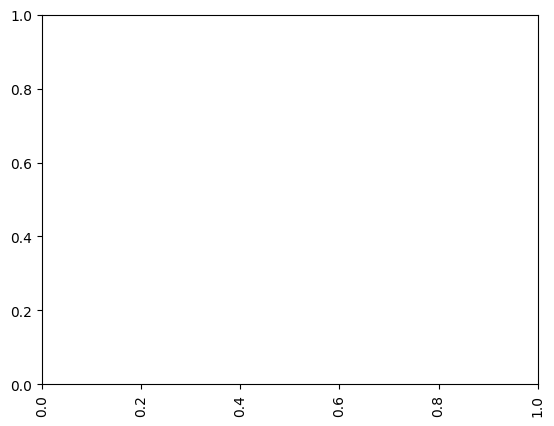

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.xticks(rotation=90)
plt.show()
cm = confusion_matrix(y_test, predictions)

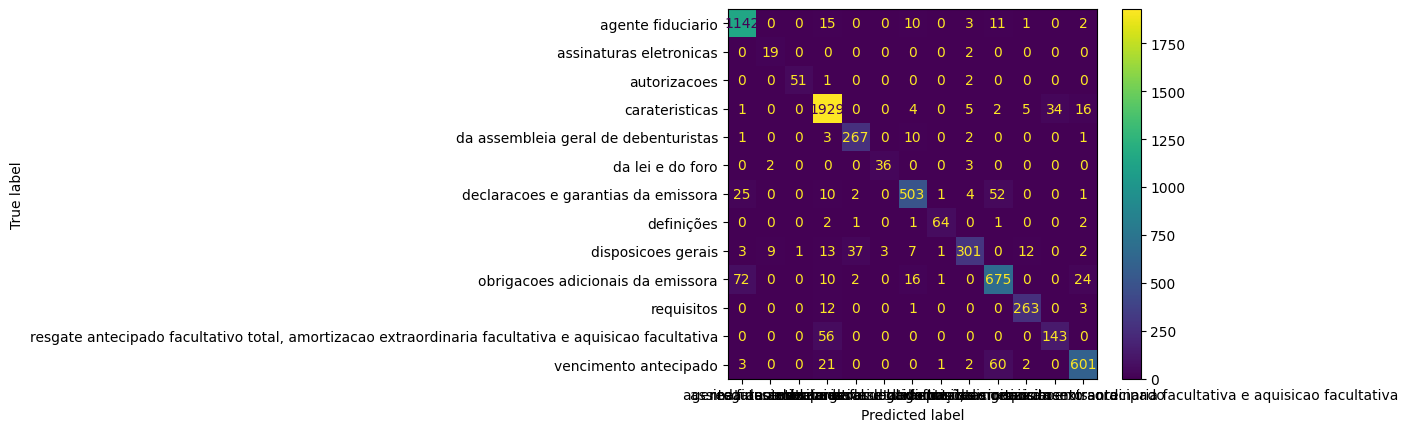

In [58]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf.classes_).plot()

In [59]:
text_clf.predict(['''
Os Debenturistas poderão, a qualquer tempo, de acordo com o disposto no artigo 71 da Lei das Sociedades por Ações, reunir-se em assembleia geral, a fim de deliberarem sobre matéria de interesse da comunhão dos Debenturistas (“Assembleia Geral de Debenturistas”). As Assembleias Gerais de Debenturistas serão realizadas computando-se os respectivos quóruns de convocação, instalação e deliberação, a fim de deliberarem sobre matéria de interesse da comunhão dos Debenturistas.
'''])

array(['da assembleia geral de debenturistas'], dtype=object)